In [1]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('/Users/semihrahmet/Desktop/VeriSetleri/laptop_price.csv')


In [5]:
df.Company.value_counts()

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Google         3
Chuwi          3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [6]:
df =df.drop("Product",axis = 1)

In [9]:
df = df.join(pd.get_dummies(df.Company))
df =df.drop("Company",axis=1)

In [11]:
df = df.join(pd.get_dummies(df.TypeName))
df =df.drop("TypeName",axis=1)

In [16]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x:x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x:x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x:x[1])

In [18]:
df = df.drop("ScreenResolution",axis = 1)


In [ ]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x:x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x:x[1])

In [22]:
df=df.drop("Cpu",axis =1)

In [24]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [26]:
df["Ram"]=df["Ram"].str[:-2]

In [28]:
df["Ram"]=df["Ram"].astype("int")
df["CPU Frequency"]=df["CPU Frequency"].astype("float")

In [30]:
df["Screen Width"]=df["Screen Width"].astype("int")
df["Screen Height"]=df["Screen Height"].astype("float")

In [32]:
df["Memory Amount"]= df.Memory.str.split(" ").apply(lambda x:x[0])
df["Memory Type"]= df.Memory.str.split(" ").apply(lambda x:x[1])

In [36]:
def turn_memory_into_to_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")])*1000
    elif "TB" in value:
         return float(value[:value.find("TB")])*1000000 
        

In [38]:
df["Memory Amount"]=df["Memory Amount"].apply(turn_memory_into_to_MB)

In [40]:
df = df.drop("Memory",axis=1)

In [42]:
df["Weight"]=df["Weight"].str[:-2]

In [44]:
df["Weight"]=df["Weight"].astype("float")

In [48]:
df["GPU Brand"]= df.Gpu.str.split(" ").apply(lambda x:x[0])

In [54]:
df = df.drop("Gpu",axis=1)

In [57]:
df =df.join(pd.get_dummies(df.OpSys))
df= df.drop("OpSys",axis=1)

In [ ]:
cpu_categories =pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]
df =df.join(cpu_categories)
df=df.drop("CPU Brand",axis=1)


In [66]:
gpu_categories =pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]
df =df.join(gpu_categories)
df=df.drop("GPU Brand",axis=1)


KeyError: 'GPU Brand'

In [70]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 7,macOS,AMD_CPU,ARM_CPU,Intel_CPU,Nvidia_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


<AxesSubplot:>

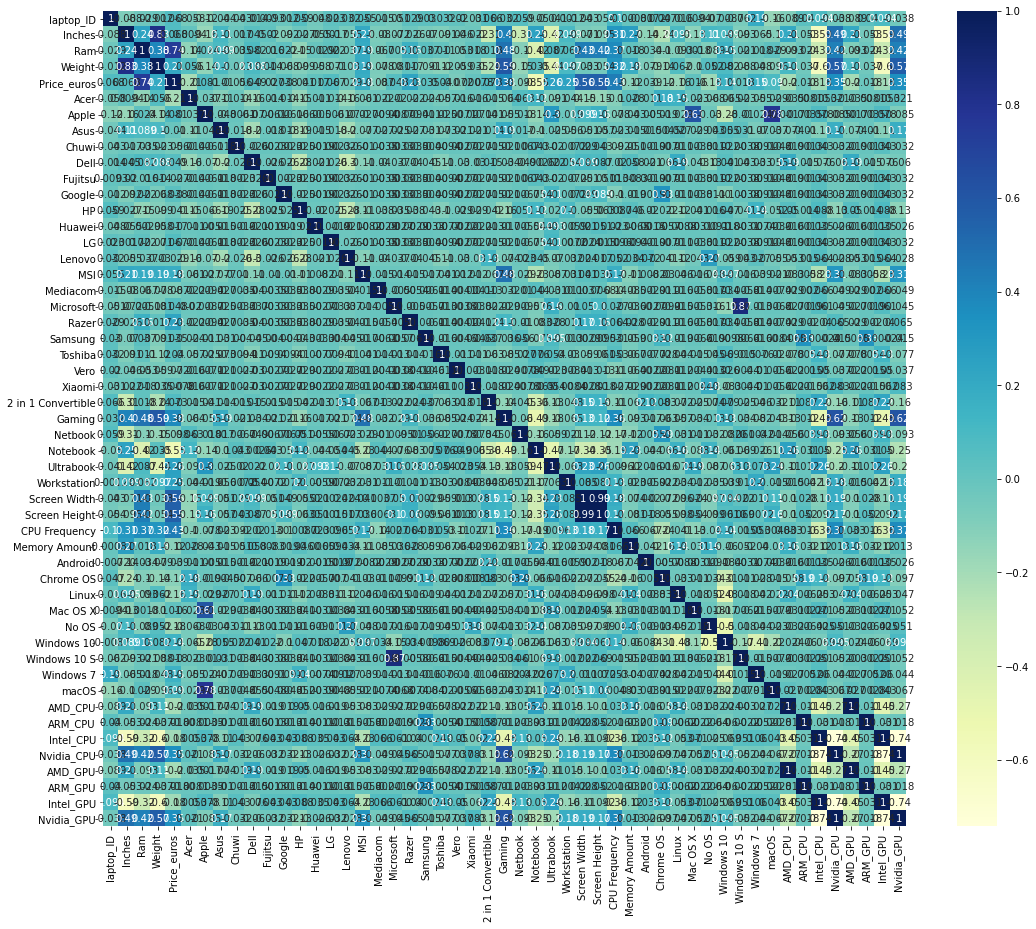

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


In [80]:
target_correlations=df.corr()['Price_euros'].apply(abs).sort_values(ascending=False)

In [86]:
selected_features =target_correlations.head(21).index

In [87]:
selected_features =list(selected_features)

In [88]:
selected_features

['Price_euros',
 'Ram',
 'Screen Width',
 'Screen Height',
 'Notebook',
 'CPU Frequency',
 'Gaming',
 'Nvidia_CPU',
 'Nvidia_GPU',
 'Ultrabook',
 'Workstation',
 'Razer',
 'Weight',
 'Acer',
 'AMD_GPU',
 'AMD_CPU',
 'Intel_GPU',
 'Intel_CPU',
 'MSI',
 'No OS',
 'Linux']

In [89]:
limited_df = df[selected_features]

<AxesSubplot:>

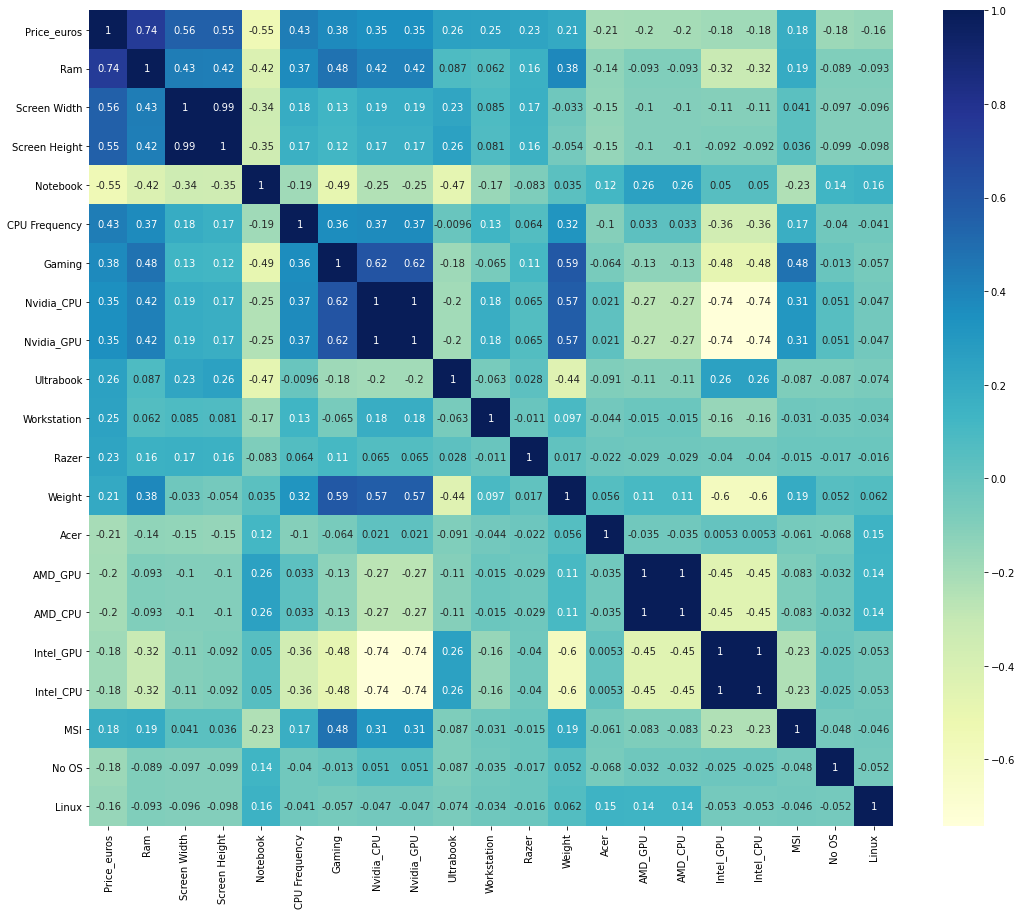

In [91]:
plt.figure(figsize=(18,15))
sns.heatmap(limited_df.corr(),annot=True,cmap="YlGnBu")

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X,y = limited_df.drop("Price_euros",axis=1),limited_df['Price_euros']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15) 

scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [116]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [117]:
forest.score(X_test_scaled,y_test)

0.8184792903621543

In [118]:
y_pred =forest.predict(X_test_scaled)

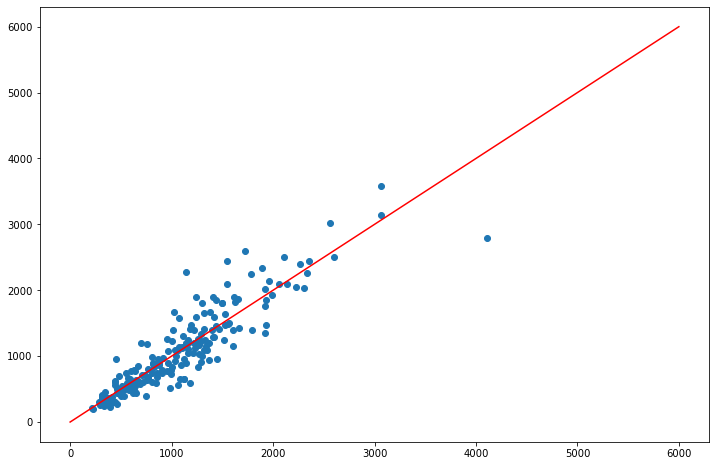

In [119]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred,y_test)
plt.plot(range(0,6000),range(0,6000),c="red")

In [120]:
X_new_scaled=scaler.transform([X_test.iloc[0]])

In [121]:
forest.predict(X_new_scaled)

array([957.65600397])

In [122]:
y_test.iloc[0]

1258.0